## EDA y Transformacion de datos
En este notebook se tomaran los archivos json que se encuentran en la carpeta Fuente_json que contienen informacion sobre binancecoin y se les realizaran las transformaciones necesarias y el analisis respectivo, luego de esto los dataframes resultantes se exportaran a archivos .xlsx los cualses quedan almacenados el la carpera Datos_Procesados en la subcarpeta respectiva.

Creacion de dataframe a partir del archivo fuente .json

In [1]:
import json
import pandas as pd

# Cargar el JSON desde el archivo
with open('../Data/Fuente_json/binancecoin/coin_id_binancecoin.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# Crear un nuevo diccionario para almacenar los datos no anidados
flat_data = {
    'id': data['id'],
    'symbol': data['symbol'],
    'name': data['name'],
    'block_time_in_minutes': data['block_time_in_minutes'],
    'hashing_algorithm': data['hashing_algorithm'],
    'description': data['description']['en'],
    'homepage': ', '.join(data['links']['homepage']),
    'reddit_subscribers': data['community_data']['reddit_subscribers'],
    'twitter_followers': data['community_data']['twitter_followers'],
    'github_repos': ', '.join(data['links']['repos_url']['github']),
    'last_updated': data['last_updated']
}

# Crear un DataFrame a partir de los datos no anidados
coin_id_binancecoin1 = pd.DataFrame([flat_data])

# Imprimir el DataFrame
print(coin_id_binancecoin1)

            id symbol name  block_time_in_minutes hashing_algorithm  \
0  binancecoin    bnb  BNB                      0              None   

                                         description  \
0  Binance Coin is the cryptocurrency of the <a h...   

                      homepage  reddit_subscribers  twitter_followers  \
0  https://www.binance.com, ,               893196           10697246   

                                        github_repos              last_updated  
0  https://github.com/binance-exchange/binance-of...  2023-08-14T05:30:29.870Z  


hay columnas que no aportan valor para la clase de analisis que se va a realizar por lo que se eliminan estas columnas.

In [2]:
#Eliminar columnas
coin_id_binancecoin1.drop(['homepage',"github_repos","last_updated","description"] , axis=1, inplace=True)

In [3]:
print(coin_id_binancecoin1)

            id symbol name  block_time_in_minutes hashing_algorithm  \
0  binancecoin    bnb  BNB                      0              None   

   reddit_subscribers  twitter_followers  
0              893196           10697246  


## grafico
para las categorias de block_time_in_minutes','reddit_subscribers','twitter_followers'

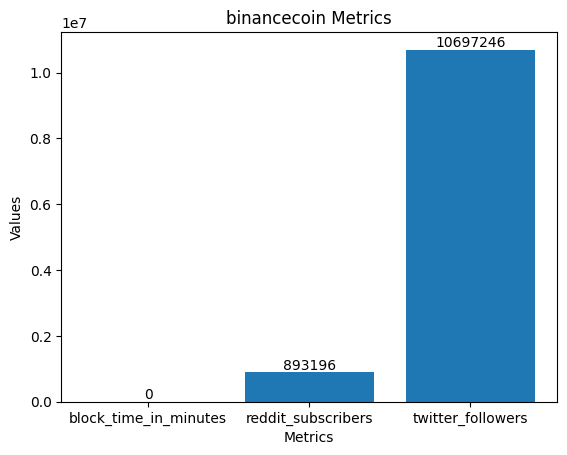

In [4]:
import matplotlib.pyplot as plt

# Datos del DataFrame
data = {
    'block_time_in_minutes': coin_id_binancecoin1['block_time_in_minutes'][0],
    'reddit_subscribers': coin_id_binancecoin1['reddit_subscribers'][0],
    'twitter_followers': coin_id_binancecoin1['twitter_followers'][0]
}

# Crear una figura y ejes
fig, ax = plt.subplots()

# Crear el gráfico de barras
bars = ax.bar(data.keys(), data.values())

# Agregar etiquetas de datos en las barras
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Configurar el título y etiquetas de los ejes
ax.set_title('binancecoin Metrics')
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')

# Mostrar el gráfico
plt.show()

exportacion del dataframe a archivo .xlsx

In [5]:
# Guardar DataFrame como archivo de Excel en una ubicación específica
coin_id_binancecoin1.to_excel("..\Data\Datos_Procesados/binancecoin\coin_id_binancecoin1.xlsx", sheet_name="coin_id_binancecoin1.xlsx", index=False, float_format="%.2f")

Creacion de dataframe a partir del archivo fuente .json

In [6]:
# Cargar el JSON desde el archivo
with open('..\Data\Fuente_json/binancecoin\coin_id_binancecoin.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# Función para aplanar diccionarios anidados
def flatten_dict(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = f"{parent_key}{sep}{k}" if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

# Aplanar los datos anidados del JSON
flattened_data = flatten_dict(data)

# Crear un DataFrame a partir de los datos aplanados
coin_id_binancecoin2 = pd.DataFrame([flattened_data])

# Imprimir el DataFrame
print(coin_id_binancecoin2)

            id symbol name asset_platform_id platforms_  \
0  binancecoin    bnb  BNB              None              

                           platforms_ethereum detail_platforms__decimal_place  \
0  0xb8c77482e45f1f44de1745f52c74426c631bdd52                            None   

  detail_platforms__contract_address  detail_platforms_ethereum_decimal_place  \
0                                                                          18   

   detail_platforms_ethereum_contract_address  ...  \
0  0xb8c77482e45f1f44de1745f52c74426c631bdd52  ...   

   developer_data_pull_requests_merged  \
0                                   55   

  developer_data_pull_request_contributors  \
0                                       26   

  developer_data_code_additions_deletions_4_weeks_additions  \
0                                                  0          

  developer_data_code_additions_deletions_4_weeks_deletions  \
0                                                  0          

  developer_da

In [7]:
coin_id_binancecoin2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 65 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   id                                                         1 non-null      object 
 1   symbol                                                     1 non-null      object 
 2   name                                                       1 non-null      object 
 3   asset_platform_id                                          0 non-null      object 
 4   platforms_                                                 1 non-null      object 
 5   platforms_ethereum                                         1 non-null      object 
 6   detail_platforms__decimal_place                            0 non-null      object 
 7   detail_platforms__contract_address                         1 non-null      object 
 8   detail_platfor

Valores faltantes

In [8]:
missing_values = coin_id_binancecoin2.isnull().sum()
print(missing_values)

id                                                    0
symbol                                                0
name                                                  0
asset_platform_id                                     1
platforms_                                            0
                                                     ..
developer_data_last_4_weeks_commit_activity_series    0
public_interest_stats_alexa_rank                      0
public_interest_stats_bing_matches                    1
status_updates                                        0
last_updated                                          0
Length: 65, dtype: int64


Exportar dataframe a archivo .xlsx

In [9]:
# Guardar DataFrame como archivo de Excel en una ubicación específica
coin_id_binancecoin2.to_excel("..\Data\Datos_Procesados/binancecoin\coin_id_binancecoin2.xlsx", sheet_name="coin_id_binancecoin2.xlsx", index=False, float_format="%.2f")

Creacion de dataframe a partir de archivo fuente .json

In [10]:
with open('..\Data\Fuente_json/binancecoin\coin_id_market_chart_binancecoin.json', 'r') as json_file:
    data = json.load(json_file)

# Crear un DataFrame a partir de los datos JSON
coin_id_market_chart_binancecoin= pd.DataFrame(data)

# Imprimir el DataFrame
print(coin_id_market_chart_binancecoin)


                       prices                          market_caps  \
0       [1505520000000, 0.11]  [1505520000000, 10725062.436515387]   
1       [1505606400000, 0.15]  [1505606400000, 15404129.090981247]   
2       [1505692800000, 0.17]  [1505692800000, 17349123.907271635]   
3       [1505779200000, 0.17]   [1505779200000, 16833419.05826789]   
4       [1505865600000, 0.17]  [1505865600000, 16662792.485643603]   
...                       ...                                  ...   
2153  [1691712000000, 241.23]  [1691712000000, 37112194985.219864]   
2154   [1691798400000, 239.6]   [1691798400000, 36864812015.19563]   
2155  [1691884800000, 240.09]    [1691884800000, 36943552949.5638]   
2156  [1691971200000, 240.03]   [1691971200000, 36913820931.58021]   
2157  [1691993958000, 240.64]   [1691993958000, 37015098148.41588]   

                            total_volumes  
0     [1505520000000, 1.0512233074868058]  
1     [1505606400000, 14.678587222975718]  
2      [1505692800000, 6.00

tratamiento de columnas como listas

In [11]:
# Descomponer las listas en columnas separadas
coin_id_market_chart_binancecoin['timestamp'] = coin_id_market_chart_binancecoin['prices'].apply(lambda x: x[0])
coin_id_market_chart_binancecoin['price'] = coin_id_market_chart_binancecoin['prices'].apply(lambda x: x[1])
coin_id_market_chart_binancecoin['market_cap'] = coin_id_market_chart_binancecoin['market_caps'].apply(lambda x: x[1])
coin_id_market_chart_binancecoin['volume'] = coin_id_market_chart_binancecoin['total_volumes'].apply(lambda x: x[1])

# Convertir los valores a tipos de datos adecuados
coin_id_market_chart_binancecoin['timestamp'] = pd.to_datetime(coin_id_market_chart_binancecoin['timestamp'], unit='ms')
coin_id_market_chart_binancecoin['price'] = pd.to_numeric(coin_id_market_chart_binancecoin['price'])
coin_id_market_chart_binancecoin['market_cap'] = pd.to_numeric(coin_id_market_chart_binancecoin['market_cap'])
coin_id_market_chart_binancecoin['volume'] = pd.to_numeric(coin_id_market_chart_binancecoin['volume'])

# Eliminar las columnas originales de listas
coin_id_market_chart_binancecoin.drop(['prices', 'market_caps', 'total_volumes'], axis=1, inplace=True)

# Mostrar el DataFrame modificado
print(coin_id_market_chart_binancecoin)

               timestamp   price    market_cap        volume
0    2017-09-16 00:00:00    0.11  1.072506e+07  1.051223e+00
1    2017-09-17 00:00:00    0.15  1.540413e+07  1.467859e+01
2    2017-09-18 00:00:00    0.17  1.734912e+07  6.001767e+00
3    2017-09-19 00:00:00    0.17  1.683342e+07  3.878927e+00
4    2017-09-20 00:00:00    0.17  1.666279e+07  4.068762e+01
...                  ...     ...           ...           ...
2153 2023-08-11 00:00:00  241.23  3.711219e+10  3.390474e+08
2154 2023-08-12 00:00:00  239.60  3.686481e+10  3.637634e+08
2155 2023-08-13 00:00:00  240.09  3.694355e+10  1.952054e+08
2156 2023-08-14 00:00:00  240.03  3.691382e+10  2.307638e+08
2157 2023-08-14 06:19:18  240.64  3.701510e+10  2.857713e+08

[2158 rows x 4 columns]


transformacion de datos

In [12]:
# Convertir la columna 'timestamp' a tipo datetime
coin_id_market_chart_binancecoin['timestamp'] = pd.to_datetime(coin_id_market_chart_binancecoin['timestamp'])

# Obtener solo la fecha de la columna 'timestamp'
coin_id_market_chart_binancecoin['timestamp'] = coin_id_market_chart_binancecoin['timestamp'].dt.date

In [13]:
coin_id_market_chart_binancecoin

,timestamp,price,market_cap,volume
0,2017-09-16,0.11,1.072506e+07,1.051223e+00
1,2017-09-17,0.15,1.540413e+07,1.467859e+01
2,2017-09-18,0.17,1.734912e+07,6.001767e+00
3,2017-09-19,0.17,1.683342e+07,3.878927e+00
4,2017-09-20,0.17,1.666279e+07,4.068762e+01
...,...,...,...,...
2153,2023-08-11,241.23,3.711219e+10,3.390474e+08
2154,2023-08-12,239.60,3.686481e+10,3.637634e+08
2155,2023-08-13,240.09,3.694355e+10,1.952054e+08
2156,2023-08-14,240.03,3.691382e+10,2.307638e+08


In [14]:
# cambiar nombre columna
coin_id_market_chart_binancecoin.rename(columns={'timestamp': 'date'}, inplace=True)

In [15]:
print(coin_id_market_chart_binancecoin)

            date   price    market_cap        volume
0     2017-09-16    0.11  1.072506e+07  1.051223e+00
1     2017-09-17    0.15  1.540413e+07  1.467859e+01
2     2017-09-18    0.17  1.734912e+07  6.001767e+00
3     2017-09-19    0.17  1.683342e+07  3.878927e+00
4     2017-09-20    0.17  1.666279e+07  4.068762e+01
...          ...     ...           ...           ...
2153  2023-08-11  241.23  3.711219e+10  3.390474e+08
2154  2023-08-12  239.60  3.686481e+10  3.637634e+08
2155  2023-08-13  240.09  3.694355e+10  1.952054e+08
2156  2023-08-14  240.03  3.691382e+10  2.307638e+08
2157  2023-08-14  240.64  3.701510e+10  2.857713e+08

[2158 rows x 4 columns]


In [16]:
coin_id_market_chart_binancecoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2158 entries, 0 to 2157
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        2158 non-null   object 
 1   price       2158 non-null   float64
 2   market_cap  2158 non-null   float64
 3   volume      2158 non-null   float64
dtypes: float64(3), object(1)
memory usage: 67.6+ KB


## Grafico
para evidenciar outliers

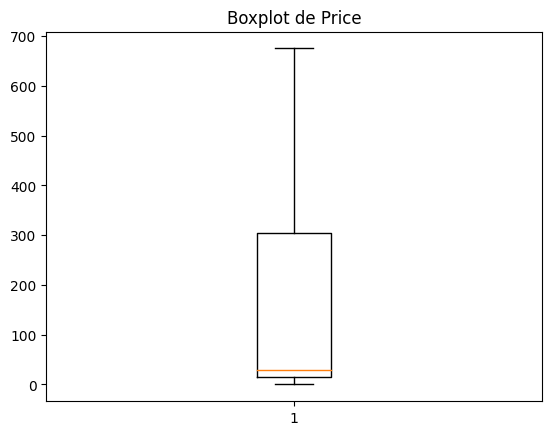

In [17]:
import matplotlib.pyplot as plt
plt.boxplot(coin_id_market_chart_binancecoin['price'])
plt.title('Boxplot de Price')
plt.show()

## Grafico de lineas dobles
para evidenciar como han evolucionado entre si el precio y la capitalizacion del mercado

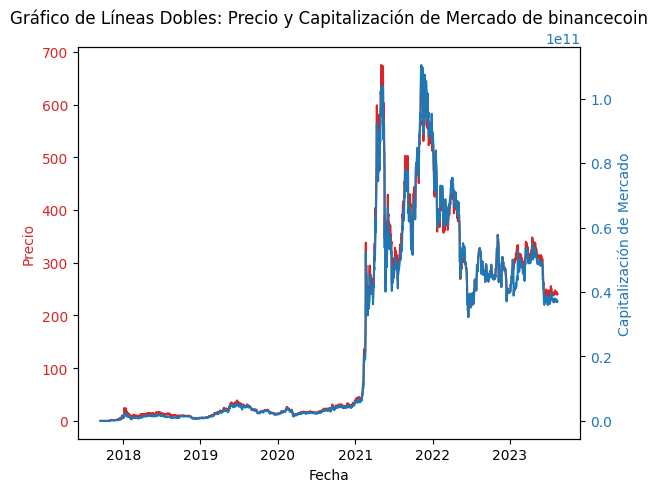

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna 'date' a tipo datetime
coin_id_market_chart_binancecoin['date'] = pd.to_datetime(coin_id_market_chart_binancecoin['date'])

# Crear el gráfico de líneas dobles
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Precio', color=color)
ax1.plot(coin_id_market_chart_binancecoin['date'], coin_id_market_chart_binancecoin['price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Segundo eje y
color = 'tab:blue'
ax2.set_ylabel('Capitalización de Mercado', color=color)
ax2.plot(coin_id_market_chart_binancecoin['date'], coin_id_market_chart_binancecoin['market_cap'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # Ajustar el diseño del gráfico
plt.title('Gráfico de Líneas Dobles: Precio y Capitalización de Mercado de binancecoin')
plt.show()

## Gráfico de Retorno Diario
Para calcular los retornos diarios del precio y vizulalizar cómo varían en función de los días.

C:\Users\Gio\AppData\Local\Temp\ipykernel_12436\2823382859.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_last_6_months['daily_return'] = data_last_6_months['price'].pct_change()


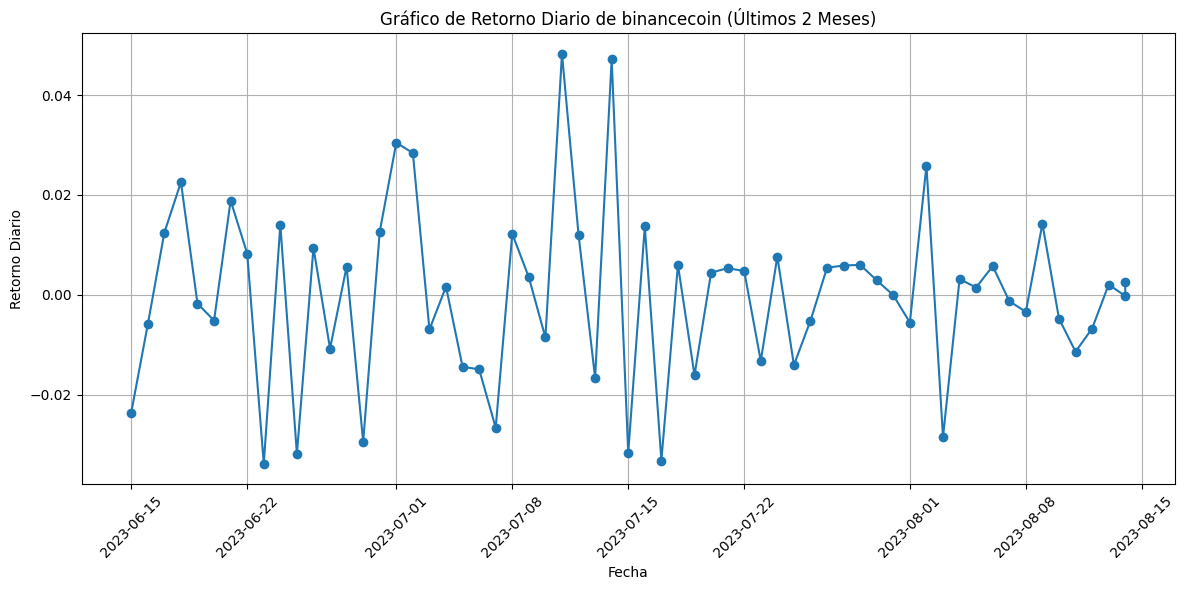

In [29]:
import pandas as pd
import matplotlib.pyplot as plt


# Convertir la columna 'date' a tipo datetime
coin_id_market_chart_binancecoin['date'] = pd.to_datetime(coin_id_market_chart_binancecoin['date'])

# Obtener la fecha actual
current_date = pd.to_datetime('2023-08-14')  # Cambia la fecha a la actual si es necesario

# Calcular la fecha 6 meses antes de la fecha actual
six_months_ago = current_date - pd.DateOffset(months=2)

# Filtrar los datos para los últimos 6 meses
data_last_6_months = coin_id_market_chart_binancecoin[
    (coin_id_market_chart_binancecoin['date'] >= six_months_ago) &
    (coin_id_market_chart_binancecoin['date'] <= current_date)
]

# Calcular los retornos diarios del precio
data_last_6_months['daily_return'] = data_last_6_months['price'].pct_change()

# Crear el gráfico de retorno diario
plt.figure(figsize=(12, 6))
plt.plot(data_last_6_months['date'], data_last_6_months['daily_return'], marker='o')
plt.title('Gráfico de Retorno Diario de binancecoin (Últimos 2 Meses)')
plt.xlabel('Fecha')
plt.ylabel('Retorno Diario')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Gráfico de Precios y Volumen
Se combinan dos series de datos en un solo gráfico para ver cómo los precios y el volumen de negociación están relacionados.

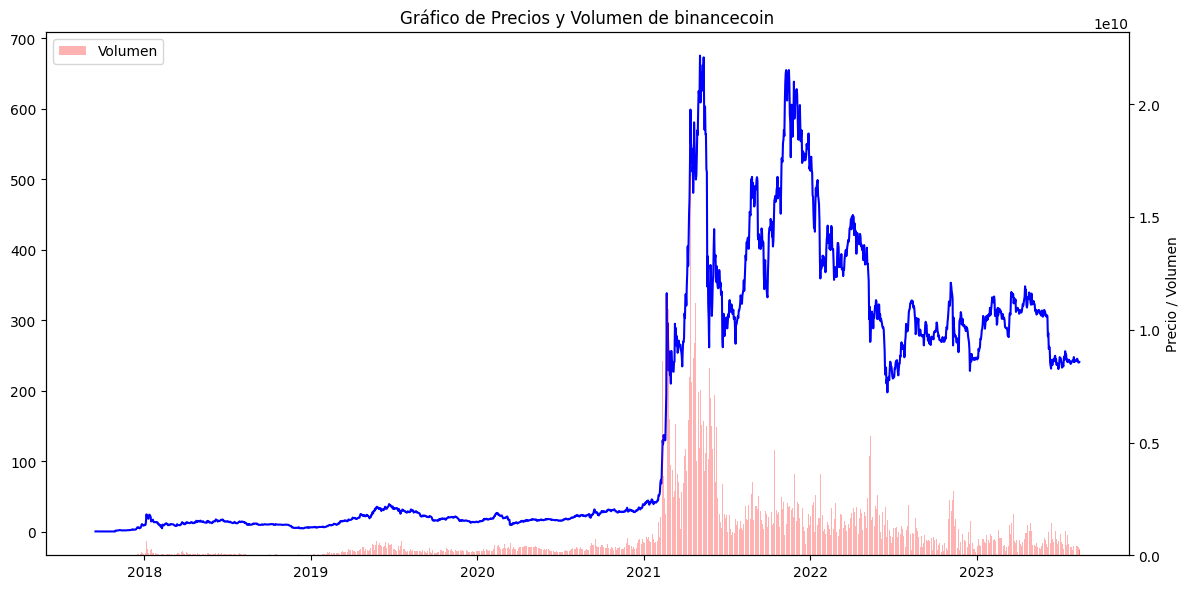

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna 'date' a tipo datetime
coin_id_market_chart_binancecoin['date'] = pd.to_datetime(coin_id_market_chart_binancecoin['date'])

# Crear el gráfico de precios y volumen combinados
plt.figure(figsize=(12, 6))

# Gráfico de precios (línea azul)
plt.plot(coin_id_market_chart_binancecoin['date'], coin_id_market_chart_binancecoin['price'], color='blue', label='Precio')

# Crear un segundo eje y para el volumen
plt.gca().twinx()

# Gráfico de volumen (barra roja)
plt.bar(coin_id_market_chart_binancecoin['date'], coin_id_market_chart_binancecoin['volume'], color='red', alpha=0.3, label='Volumen')

plt.title('Gráfico de Precios y Volumen de binancecoin')
plt.xlabel('Fecha')
plt.ylabel('Precio / Volumen')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

In [21]:
# Guardar DataFrame como archivo de Excel en una ubicación específica
coin_id_market_chart_binancecoin.to_excel("..\Data\Datos_Procesados/binancecoin\coin_id_market_chart_binancecoin.xlsx", sheet_name="coin_id_market_chart_binancecoin.xlsx", index=False, float_format="%.2f")

d:\Programs Instalds\Python\Program Instald\lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [22]:
with open('..\Data\Fuente_json/binancecoin\coin_id_ohlc_binancecoin.json', 'r') as json_file:
    data = json.load(json_file)

# Crear un DataFrame a partir de los datos JSON
coin_id_ohlc_binancecoin= pd.DataFrame(data)

# Imprimir el DataFrame
print(coin_id_ohlc_binancecoin)

                 0       1       2       3       4
0    1505779200000    0.11    0.17    0.11    0.17
1    1506124800000    0.17    0.17    0.09    0.09
2    1506470400000    0.09    0.12    0.09    0.12
3    1506729600000    0.14    0.17    0.13    0.17
4    1506988800000    0.10    0.12    0.10    0.12
..             ...     ...     ...     ...     ...
558  1690761600000  240.42  242.56  240.42  242.54
559  1691020800000  241.19  247.43  240.38  240.38
560  1691366400000  241.14  242.88  241.14  242.57
561  1691712000000  241.74  245.18  241.23  241.23
562  1692057600000  239.60  240.09  239.60  240.03

[563 rows x 5 columns]


In [23]:
coin_id_ohlc_binancecoin[0] = pd.to_datetime(coin_id_ohlc_binancecoin[0], unit='ms')

In [24]:
# cambiar nombre columna
coin_id_ohlc_binancecoin.rename(columns={'date': 'Date', 1:'Open', 2:'High', 3:'Low', 4:'Close'}, inplace=True)

In [25]:
coin_id_ohlc_binancecoin

,0,Open,High,Low,Close
0,2017-09-19,0.11,0.17,0.11,0.17
1,2017-09-23,0.17,0.17,0.09,0.09
2,2017-09-27,0.09,0.12,0.09,0.12
3,2017-09-30,0.14,0.17,0.13,0.17
4,2017-10-03,0.10,0.12,0.10,0.12
...,...,...,...,...,...
558,2023-07-31,240.42,242.56,240.42,242.54
559,2023-08-03,241.19,247.43,240.38,240.38
560,2023-08-07,241.14,242.88,241.14,242.57
561,2023-08-11,241.74,245.18,241.23,241.23


In [26]:
coin_id_ohlc_binancecoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   0       563 non-null    datetime64[ns]
 1   Open    563 non-null    float64       
 2   High    563 non-null    float64       
 3   Low     563 non-null    float64       
 4   Close   563 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 22.1 KB


In [27]:
# Guardar DataFrame como archivo de Excel en una ubicación específica
coin_id_ohlc_binancecoin.to_excel("..\Data\Datos_Procesados/binancecoin\coin_id_ohlc_binancecoin.xlsx", sheet_name="coin_id_ohlc_binancecoin.xlsx", index=False, float_format="%.2f")